# MBA FIAP Inteligência Artificial & Machine Learning

<p align="center">
<img src="imagens/smart-hiring.jpg">
</p>

## Tecnologia de Processamento de Imagens
## Projeto Final Smart-Hiring: Entrevista Virtual

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir uma aplicação que tem por objetivo analisar imagens e extrair uma série de informações que serão utilizadas para compor uma análise de seleção de candidatos para uma entrevista simulada.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Allan Antunes             | RM 331561      | `1IA` |
| Mathias Neves             | RM 330353      | `1IA` |
| Roberto Celestino         | RM 330428      | `1IA` |


Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```## IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Detector de objeto (cartão de identificação)__
2. __Detector de faces__
3. __Detector de sorriso__
4. __Detector de bocejo__
5. __Detector de olhos fechados__
6. __Descritor de objetos na cena__
7. __Conclusões Finais__


## Introdução

_Disclaimer: as informações do caso de uso de negócio são meramente ilustrativas para aplicar as tecnologias de visão computacional de forma mais aderente ao desafio proposto. Todos os comentários foram forjados para dar vazão aos desafios e não representam formas de avaliação de candidatos. A empresa em questão, a Wandee, é fictícia._

A empresa **Wandee**, especializada em entrevistas virtuais, está construindo um produto minimamente viável (MVP) para testar algumas tecnologias voltadas a visão computacional para tornar o processo de seleção, especialmente a etapa de entrevista mais completo, rápido e que permita aos recrutadores obterem feedbacks mais completos além da profunidade técnica de cada posição, como por exemplo, se o candidato é ele mesmo (prova de identidade), se possuí o cartão de acesso a entrevista, aspectos de atenção durante a entrevista, como concentração e foco. Ainda será analisado questões de organização no local do entrevistado, buscando por objetos na visão da câmera.

Todo o processo de entrevista virtual é feito remotamente por meio de uma câmera (_webcam_). Logo, todos os algoritmos desenvolvidos precisam capturar as imagens desta origem.

## 1. Detector de objeto

Antes de começar com o processo de autenticação, os candidatos precisam utilizar o celular e exibir o ícone da empresa para a câmera. Se o resultado for positivo indica que o sistema pode avançar para a próxima etapa.

<p align="center">
<img src="imagens/logo.png" height="60%" width="60%">
</p>

Construa um algortimo que seja capaz de analisar uma região de interesse específica (ROI, _Region of Interest_), capturada por vídeo, e valide se o ícone está presente ao ser exibido pelo celular do candidato. 

Lembre-se que questões de proporção e rotação precisam ser consideradas na identificação.

Este processo precisa ser de rápida identificação, neste caso não será possível aplicar técnicas que envolvam aprendizado de máquina. É indicado o uso de detectores de objetos e extratores de características.

_No seu smartphone abra o navegador e entre com o link https://raw.githubusercontent.com/michelpf/fiap-ml-tec-proc-imagens-capstone/master/projeto-final/imagens/logo.png_

Ou, escaneie com seu smartphone o QRCode abaixo.

<p align="center">
<img src="imagens/qrcode.png" height="25%" width="25%">
</p>

In [ ]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from scipy.spatial import distance as dist
import collections
from matplotlib.pyplot import figure
# Debugger para Jupyter
#import pixiedust

# Controle de imagens geradas
import time

%matplotlib inline

In [ ]:
# Funcao de Auxilio para fechar janela do Python em ambientes Windows ou MAC
def close_windows():
    if os.name == 'posix':
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        if cap:
            cap.release()
    elif os.name == 'nt':
        cv2.waitKey()
        cv2.destroyAllWindows()
        if cap:
            cap.release()

A função abaixo deve receber uma imagem capturada da região de interesse e comparar com a imagem template do logotipo de empresa. O retorno é o número de correspondências encontradas.

In [3]:
def detector(imagem, template):
    # Conversão da imagem para escala de cinza
    imagem_norm = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # IMPLEMENTAR
    #
    # Escolha um detector de imagens adequado, configure e aplique um algoritmo de match
    # Esta função deve retornar o número de correspondências de uma imagem versus seu template
        
    # Utilizando ORB para identificação de corrrespondências entre as imagens
    # O maior número de matches deu inicio no parametro abaixo, definido após testes
    orb_detector = cv2.ORB_create(4272)

    # Imagem (aonde procurar)
    kps = orb_detector.detect(imagem_norm, None)
    kps_target, desc_target = orb_detector.compute(imagem_norm, kps)

    # Template (o que procurar)
    kps = orb_detector.detect(template, None)
    kps_search, desc_search = orb_detector.compute(template, kps)
    
    # Utilizando tecnica de FLANN
    FLANN_INDEX_LSH = 6
    index_params= dict(algorithm = FLANN_INDEX_LSH, table_number = 5, key_size = 12, multi_probe_level = 1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    # Verificando matches entre as duas imagens
    matches = flann.knnMatch(desc_target, desc_search, k=2)
        
    return len(matches)

Carregue a imagem de template.

In [4]:
# Função de suporte para exibição de imagens no Jupyter
def exibir_imagem(imagem):
    figure(num=None, figsize=(15, 10))
    image_plt = mpimg.imread(imagem)
    plt.imshow(image_plt)
    plt.axis('off')
    plt.show()

Utilize a função ```detector``` para obter as correspondências identificadas. Por meio de testes prévios, estabeleça qual o valor de _matches_ para o template definido. Isto pode fazer com que os valores do detector ORB sejam ajustados. A ideia é realizar um um processo de experimentação.

Após definir o limiar, desenvolva uma regra para comparar com o valor de _matches_ e exibir em tempo real se o template foi localizado.

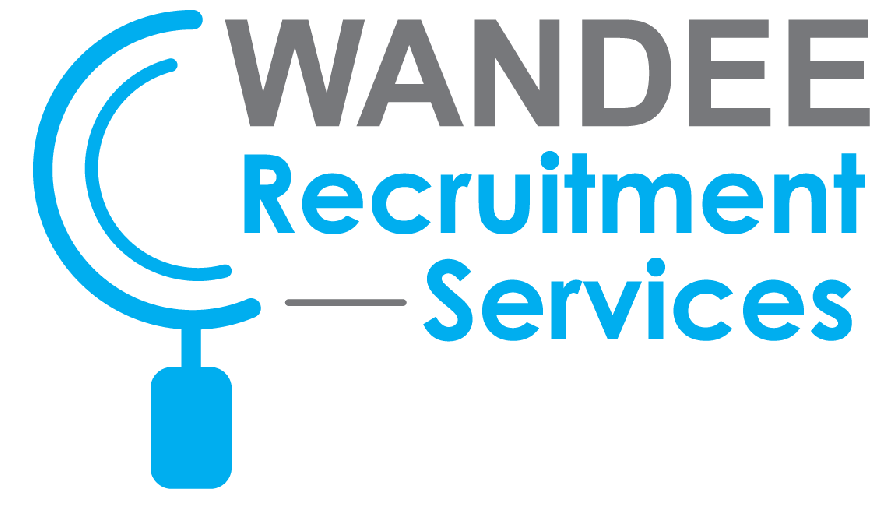

In [5]:
# Exibir o Logo
exibir_imagem('imagens/logo.png')

In [6]:
# IMPLEMENTAR
# Carregue a imagem do logotipo
template = cv2.imread('imagens/logo.png', 0)

# Teste
# Foto salva pela webcam da tela do celular, para testar a captura
# imagem = cv2.imread('imagens/ao_vivo.png') 
# detector(imagem, template)

O trecho de códido abaixo é para iniciar a captura de imagens da câmera. Nela será definido uma região de interesse que deverá ser capturado uma imagem para acionar a função de detecção.

In [7]:
# Leitura da Webcam
cap = cv2.VideoCapture(0)

# Salva somente a 3 imagem identificada
i = 1

while True:
    # Obtendo imagem da câmera
    ret, frame = cap.read()
    
    if ret:
        # Definindo região de interesse (ROI)
        height, width = frame.shape[:2]
        top_left_x = int(width / 3)
        top_left_y = int((height / 2) + (height / 4))
        bottom_right_x = int((width / 3) * 2)
        bottom_right_y = int((height / 2) - (height / 4))
    
        # Desenhar retângulo na região de interesse
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), 255, 3)

        # Obtendo região de interesse para validação do detector
        cropped = frame[bottom_right_y:top_left_y , top_left_x:bottom_right_x]

        # Executando o detector, definindo um limiar e fazendo a comparação para validar se o logotipo foi detectado
        # IMPLEMENTAR
        
        result = detector(cropped, template)
        
        # Imagens puras da Webcam geram valores entre 400 e 800, ao mostrar o layout real na tela do celular, 
        # Inicialmente usamos 1900 para pegar a foto, mas devido a movimentação da mão nem sempre é possível
        # pegar completamente a imagem, aumentando para 1900 e focando na precisão dentro da area 
        # determinada
        
        if result >= 500:
            cv2.putText(frame, "Identificado " + str(result), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 6)
            
            # Salva a terceira imagem identificada
            i += 1
            if i == 3:
                print(result)
                horario = int(round(time.time() * 1000))
                nome_imagem = "imagens/resultado_auth/resultado_{0}.png".format(horario)                                                               
                cv2.imwrite(nome_imagem, frame)

        # Apresenta o frame com o texto acima, se o match for valido
        cv2.imshow("Identificacao de Template", frame)
        
    # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem
    if cv2.waitKey(1) == 13: 
        break

close_windows()

926


Armazene uma evidência do logotipo detectado, exibindo na imagem a região de interesse com a imagem.

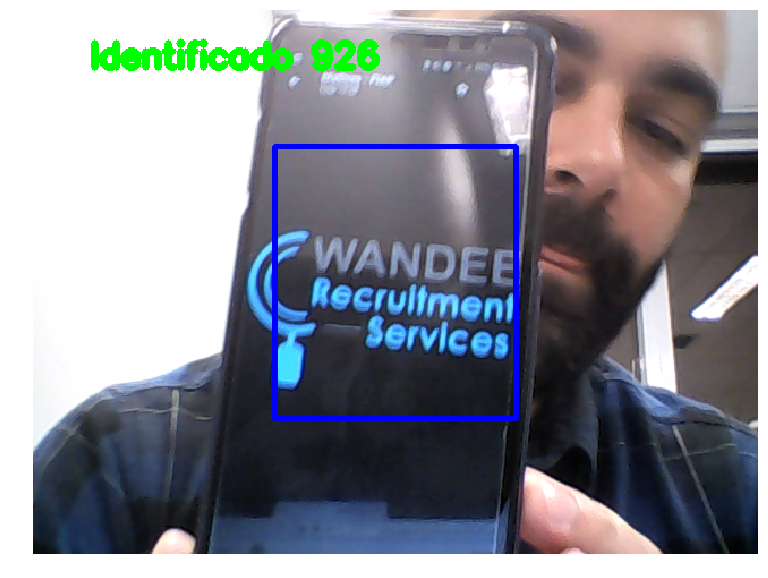

In [8]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook
# Imagem já no diretório
nome_imagem = "imagens/resultado_auth/resultado_1548288832497.png"
exibir_imagem(nome_imagem)

## 2. Detector de faces

Para validação de autenticidade do candidado, o processo de entrevista virtual precisa confirmar se a pessoa selecionada para a entrevista é a mesma. Neste caso a técnica a ser utilizada é por meio de um reconhecimento facial,

Inicialmente, precisamos treinar um classificador próprio do OpenCV com exemplos de imagem do candidato.
Eleja uma pessoa do grupo para ser o candidato e treine um conjunto de imagens suficiente para que seja possível alcançar similaridade, onde o valor de não similaridade seja de até 40 pontos. O algortimo de similaridade de faces utiliza um sistema que quando a face é idêntica, o número de pontos é igual a 0, se for totalmente diferente, tende ao infinito. Logo, patamar de 30 a 40 é um bom número de similaridade.

**Implementação**

Nesta etapa inicial será realizado o treinamento das faces de um determinado candidato.
Você precisará coletar um número de imagens relevante do candidato. Além disso, é recomendável aplicação de um detector de faces para que seja extraído somente a _região de interesse_ ou seja, a própria face. Uma maneira de conseguir este tipo de segmentação é utilizando um classificador em cascada de Haar treinado para este fim.

Utilize a função a abaixo para segmentar o rosto de uma imagem.

In [9]:
face_classifier = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.2, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face


Crie um algoritmo para que treine um determinado número de faces, escolhido pelo grupo, para que seja armazenado em um diretório específico para posteior treinamento.

In [10]:
# Adiciona o nome de quem está treinando
nome = input()

# Abre a camera
cap = cv2.VideoCapture(0)

# Inicio de contagem
contagem = 0

# IMPLEMENTAR
# Defina o número máximo de imagens a serem coletadas
# 100 é o número ideal, dessa forma, vamos utiliar 150 para ter uma precisao maior
contagem_maxima = 150

while True:
    ret, frame = cap.read()

    if ret:
        
        try:

            # IMPLEMENTAR
            # Crie um algoritmo para salvar as imagens segmentadas em face em um determinado diretório
            rosto = face_extractor(frame)

            if rosto is not None:
                # Guarda imagem encontrada pela funcao face_extractor
                contagem += 1
                nome_imagem = "imagens/fotos_treinamento/treinamento_{0}_{1}.png".format(nome, contagem)
                cv2.imwrite(nome_imagem, rosto)

            # Contagem para exibicao na tela
            cv2.putText(frame, str(contagem), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            cv2.imshow("Imagem de Treino", frame)

            # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem
            # ou for alcançado a contagem máxima (amostras)
            if cv2.waitKey(1) == 13 or (contagem == contagem_maxima):
                break
        except:
            # Se nao identificar rosto, continua ate o proximo rosto identificado
            continue
        
# Desativa a webcam
close_windows()
print("Coleta de amostras completado")

Allan
Coleta de amostras completado


O treinamento utilizando é um próprio classificador de faces que o OpenCV possui. Neste caso vamos optar pelo classificador Local Binary Patterns Histograms (LBPH), que para este cenário é o mais adequado.

O grupo pode optar por escolher outros tipos de algoritmos do OpenCV, se desejarem.

In [11]:
# IMPLEMENTAR

# Defina na chave 0 o nome do candidato
# Criado um algoritmo para receber mais de uma label
persons = {0: 'Mathias',
           1: 'Allan',
           2: 'Roberto'}

training_data, labels = [], []

# Defina o diretório utilizado para salvar as faces de exemplo
for x in persons:
    
    data_path = 'imagens/fotos_treinamento/'

    # Pega somente as imagens de cada pessoa listada no dict, por iteracao
    onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f)) and f not in '.DS_Store' and persons[x] in f]

    for i, files in enumerate(onlyfiles):
        image_path = data_path + onlyfiles[i]
        images = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        training_data.append(images)
        
        # Label da pessoa eh a key do dict
        labels.append(x)


# Criando uma matriz da lista de labels
labels = np.asarray(labels, dtype=np.int32)

# Treinamento do modelo
model = cv2.face.LBPHFaceRecognizer_create()
model.train(training_data, labels)

print("Modelo treinado com sucesso.")

Modelo treinado com sucesso.


Vamos considerar uma classificação com sucesso quando a distândia de predição da face analisada for entre 30 e 40. Os valores de retorno destes classificador não é um índice de confiança.

Quando houver uma deteção dentro da margem de distância, armazene a imagem com o nome "success_candidate.png", constando as informações do nome do candidato e a distância identificada pelo classificador (retorno do método _predict_).

Escreva na tela onde a imagem da câmera é capturada a informação da distância de detecção da face extraída versus a face treinada, emuldure a face num retângulo e, se a face for devidadamente identificada, inclua um texto com a informação "```<Nome do candidato>``` Reconhecido"

In [12]:
# Funcao para identificar o rosto e retornar a resolucao

def retorna_faces(frame):
    
    # Converte para Black e White
    bw = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Identificador de faces
    # Escala de ate 20% e precisao de 5
    faces = face_classifier.detectMultiScale(bw, 1.2, 5)
    
    if faces is ():    
        # Se nulo, retorna vazio
        return [], 0, 0
    
    for (x,y,w,h) in faces:
        # Desenha o retangulo na area de interesse
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,130), 2)
        roi = frame[y:y+h, x:x+w]
        roi = cv2.resize(roi, (200, 200))

    # Retona imagem original, area de interesse, eixo X e eixo Y
    return roi, x, y

In [13]:
# Magic do Jupyter para debug
#%%pixie_debugger

cap = cv2.VideoCapture(0)

# Salva somente a terceira imagem
i = 1

while True:
    ret, frame = cap.read()
    if ret:
        
        # IMPLEMENTAR
        try:
            # Extraia a face da imagem obtida da câmera
            # Utilize a função face_extractor para segmentar a imagem de rosto        

            # Identifica o rosto
            face, x, y = retorna_faces(frame)
            
            # Alterando imagem para escala de preto
            face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

            # Predicao da imagem
            results = model.predict(face)

            # sucesso quando a distândia de predição da face analisada for entre 30 e 40:
            if 30 <= int(results[1]) <= 40:
                
                # Mostra a distancia do classificador
                # Proximo de zero = Menor numero, menor diferenca
                # Proximo ao infinito = Maior numero, maior diferenca
                display_string = "Distancia: " + str(int(results[1])) 

                # Adiciona o texto na imagem
                cv2.putText(frame, display_string, (x, y-20), cv2.FONT_HERSHEY_DUPLEX, 1, (0,120,255), 2)

                # Estabeleça um algoritmo para concluir se o resultado é 'Sucesso', candidato identificado ou 
                cv2.putText(frame, persons[results[0]] + " Reconhecido", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 2)

                # Salvar somente a terceira imagem reconhecida
                i += 1
                if i == 3:
                    horario = int(round(time.time() * 1000))
                    nome_imagem = "imagens/validacao_candidato/success_{0}_{1}.png".format(persons[results[0]], horario)
                    cv2.imwrite(nome_imagem, frame)
            else:
                # Caso seja identificado um rosto, mas nao reconhecido pelo modelo
                cv2.putText(frame, "Pessoa nao identificada", (x, y-50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
                    
            cv2.imshow('Reconhecimento de face', frame)
                
        except:
            # Analise também situações onde a face não é identificada
            #'Não Indetificado' para quando não for localizado o candidato
            cv2.putText(frame, "Nao identificado", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Reconhecimento de face', frame)
        
        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem    
        if cv2.waitKey(1) == 13: #13 is the Enter Key
            break
        
close_windows()

Guarde como evidência de classificação bem sucedida, uma imagem capturada da câmera durante o processo.

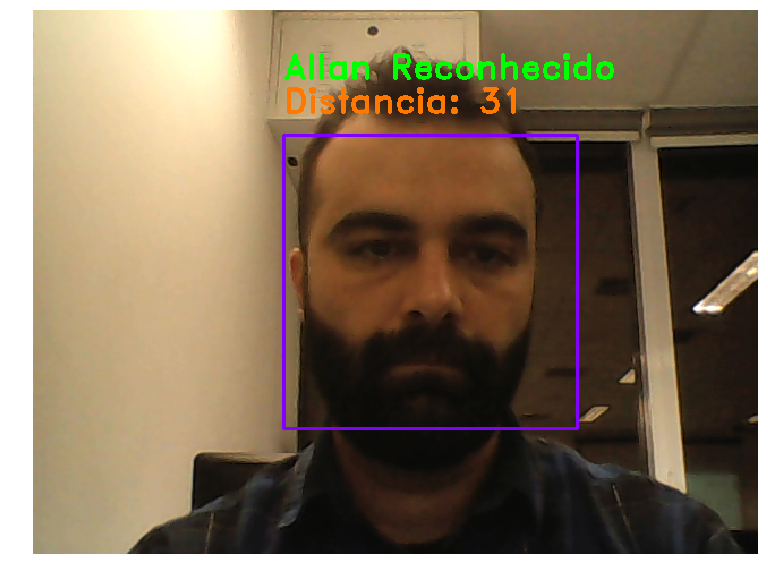

In [15]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook
nome_imagem = 'imagens/validacao_candidato/success_Allan_1548288964420.png'
exibir_imagem(nome_imagem)

## 3. Detector de sorriso

Muitas empresas demandam que futuros empregados demonstrem educação, tranquilidade e empatia, características que podem ser evidencias com uma uma análise simples da receptividade do candidado por meio das expressões de seu rosto.

Um detector importante disto é sobre se o candidato mantém o semblante fechado ou se mantém um rosto alegre, oscilando sorrisos a medida que é realizada a entrevista e demais questionamentos.

Utilize as bibliotecas do _DLib_, em especial o preditor treinado para 68 pontos de marcação de face, para identificar a geometria dela e obtenha as marcações de interesse.

Uma das formas de extraírmos os pontos de contorno da face é utilizando o modelo do _DLib_ ```shape_predictor_68_face_landmarks.dat```. Este modelo retorna 68 pontos da face

### Setup do DLib

Instalação DLib no MAC:  
 - Instale o [Brew](https://brew.sh/);
 - Em seguida, digite: brew install cmake;
 - Aguarde a instalação;
 - Ao final, instalar o DLib no Python: pip install dlib

Obs: CMake é a biblioteca do C para o MAC, o DLib utiliza funções C para calcular os pontos.

In [16]:
import dlib
import numpy 

predictor_68_path = "modelos/shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(predictor_68_path)
detector = dlib.get_frontal_face_detector()

Liste os pontos de cada parte do rosto. A partir deles poderão ser feitos estudos geométricos para identificar características relcioandos aos mesmos.

In [17]:
# IMPLEMENTAR

# Para cada constante abaixo, indique uma lista de pontos dos 68 identificados pelo classificador do DLib
FACE_POINTS = list(range(17, 68))
MOUTH_POINTS = list(range(48, 61))
RIGHT_BROW_POINTS = list(range(17, 22))
LEFT_BROW_POINTS = list(range(22, 27))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
NOSE_POINTS = list(range(27, 35))
JAW_POINTS = list(range(0, 17))

Crie uma função que será utilizada para identificar um sorriso. Leve em consideração estudos que envolvem cálculo de razão de aspecto geométrico e adapte para os pontos dos lábios.

Estude o paper de [Soukupová e Čech de 2016](http://vision.fe.uni-lj.si/cvww2016/proceedings/papers/05.pdf) para entender como obter um cálculo de aspecto de razão para formas geométricas da face. Você pode fazer aproximações a partir do estudo do paper para outras formas, como os lábios e olhos.

Crie uma função ```month_aspect_ratio``` que receba os pontos dos lábios e calcule o aspecto de razão para que seja exibida dados de quando a boca está aberta, fechada, dentre outros comportamentos.

In [18]:
def month_aspect_ratio(mouth):
    
    # IMPLEMENTAR
    # Utilize referências do paper para calcular o MAR (Mouth Aspect Ratio)
    
    # IMPLEMENTAR
    a = dist.euclidean(mouth[1], mouth[11])
    b = dist.euclidean(mouth[2], mouth[10])
    c = dist.euclidean(mouth[3], mouth[9])
    d = dist.euclidean(mouth[4], mouth[8])
    e = dist.euclidean(mouth[5], mouth[7])
    
    f = dist.euclidean(mouth[0], mouth[6])

    # calcula o formato dos olhos
    mar = (a + b + c + d + e ) / (2.0 * f)
    
    return mar

# Funcao para os olhos, porem, necessaria para compilar a funcao abaixo
def eye_aspect_ratio(eye):
    
    # IMPLEMENTAR
    # Calcule o EAR (Eye Aspect Ratio) que determina o aspecto de razão da geometria de um dos olhos
    a = dist.euclidean(eye[1], eye[5])
    b = dist.euclidean(eye[2], eye[4])
    c = dist.euclidean(eye[0], eye[3])
   
    ear = (a + b) / (2.0 * c)
    return ear

Na função abaixo, inclua um segundo retorno que será a razão de aspecto dos lábios. Deixe como está o terceiro retorno, pois ele será estudado no próximo algoritmo.

In [19]:
def annotate_landmarks_convex_hull_image(im):
    im = im.copy()
    rects = detector(im, 1)
    
    if len(rects) == 0:
        return im, 0, 0
    
    landmarks_list = []
    
    for rect in rects:
        landmarks = numpy.matrix([[p.x, p.y] for p in predictor(im, rect).parts()])

        for k, d in enumerate(rects):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (0, 255, 0), 2)

            points = cv2.convexHull(landmarks[NOSE_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)

            points = cv2.convexHull(landmarks[MOUTH_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            points = cv2.convexHull(landmarks[RIGHT_BROW_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)

            points = cv2.convexHull(landmarks[LEFT_BROW_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)

            points = cv2.convexHull(landmarks[RIGHT_EYE_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            points = cv2.convexHull(landmarks[LEFT_EYE_POINTS])
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            # Boca
            month_aspect  = month_aspect_ratio(landmarks[MOUTH_POINTS])
   
            # Olhos
            eye_aspect = []
        
            # Direito
            points = cv2.convexHull(landmarks[RIGHT_EYE_POINTS])
            eye_aspect.append(eye_aspect_ratio(landmarks[RIGHT_EYE_POINTS]))
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
            # Esquerdo
            points = cv2.convexHull(landmarks[LEFT_EYE_POINTS])
            eye_aspect.append(eye_aspect_ratio(landmarks[LEFT_EYE_POINTS]))
            cv2.drawContours(im, [points], 0, (0, 255, 0), 1)
            
    return im, month_aspect, eye_aspect

Realize ensaios para definir o valor de sorriso versos simulações com os lábios normais e aberto. Um sorriso é uma estado entre os lábios fechados ou semi-fechados e a boca inteiramente aberta.
Definina abaixo os limiares inferior e superior para a identificação de um sorriso.

In [20]:
# IMPLEMENTAR
# Defina os valores mínimo e máximo para detecção do sorriso

# Valores dependem da distancia, menor numero pega mais de longe
sorriso_minimo = 0.80
sorriso_maximo = 0.95

Após identificar o sorriso, contabilize quantas vezes foram identificados.

In [21]:
cap = cv2.VideoCapture(0)

# Quantidade de sorrisos identificados
qtde_sorrisos = 0

while True:
    ret, frame = cap.read()
    
    if ret:
        try:
            
            frame, month_aspect, _ = annotate_landmarks_convex_hull_image(frame)
            
            # IMPLEMENTAR
            # Defina o algoritmo que irá identificar o sorriso baseado nos limites defindo
            # Crie uma lógica para contar quantas vezes o sorriso foi dado

            if sorriso_minimo <= month_aspect <= sorriso_maximo:
                
                # Aumenta o contador de sorrisos
                qtde_sorrisos += 1
                
                # Adiciona texto na tela de quantidade de sorrisos capturados
                cv2.putText(frame, "Sorriso "+str(qtde_sorrisos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)    

                if qtde_sorrisos == 3:
                    # Hora para criacao da foto
                    horario = int(round(time.time() * 1000))
                    imagem_sorrindo = "imagens/sorrindo/sorrindo_{0}.png" .format(horario)
                    cv2.imwrite(imagem_sorrindo, frame)

            # Adiciona texto na tela de quantidade de sorrisos capturados
            cv2.putText(frame, "Sorriso "+str(qtde_sorrisos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
            cv2.imshow("Detector de Sorriso", frame)

        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem   
        except:
            # Adiciona texto na tela de quantidade de sorrisos capturados
            cv2.putText(frame, "Sorriso "+str(qtde_sorrisos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)            
            cv2.putText(frame, "Sorriso nao identificado", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Detector de Sorriso', frame)

        if cv2.waitKey(1) == 13:
            break
        
close_windows()

Armazene um exemplo de uma imagem, na pasta ```imagens``` com o sorriso detectado para exibição.

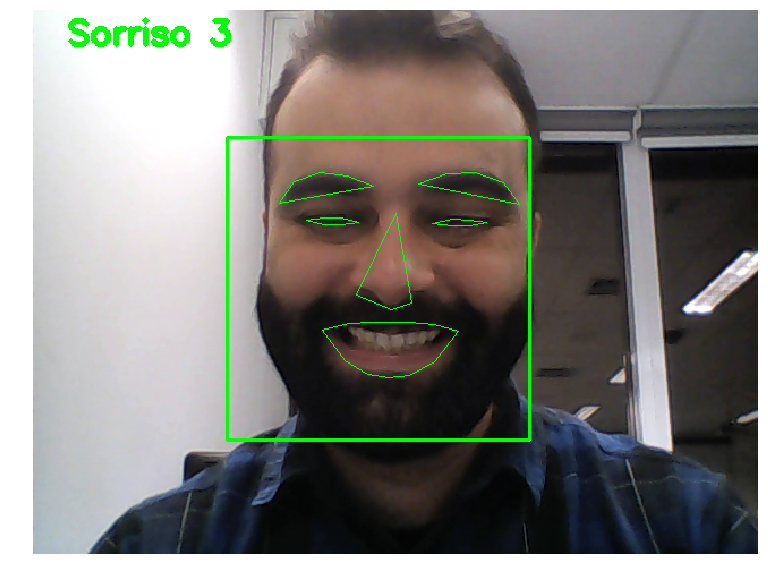

In [22]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook
# Imagem ja salva no disco
#imagem_sorrindo = "imagens/sorrindo/sorrindo_1548289048497.png"
exibir_imagem(imagem_sorrindo)

## 4. Detector de bocejos

Os candidados devem estar sempre atentos durante a entrevista virtual. Para garantir que ele se preparou adequadamente antes do início da entrevista não deverá ser tolerado bocejos.

Um detector de bocejos deverá utilizar aspectos das marcações dos lábios já definidas para identificar o bocejo. Neste caso o que será diferente é o valor da razão de aspecto.

Neste caso não há um limiar, como o bocejo é a boca aberta ao máximo, vamos definir um valor mínimo.

In [23]:
# IMPLEMENTAR
# Defina o valor mínimo de abertura dso lábios

bocejo_minimo = 1.0

In [24]:
# Quantidade de bocejos identificados
cap = cv2.VideoCapture(0)

qtde_bocejos = 0

while True:
    ret, frame = cap.read()
    
    if ret:
        try:
            frame, area_bocejo, _ = annotate_landmarks_convex_hull_image(frame)

            # IMPLEMENTAR
            # Defina o algoritmo que irá identificar o bocejo baseado no limite defindo
            # Crie uma lógica para contar quantas vezes o bocejo foi dado
            if area_bocejo >= bocejo_minimo:
                
                # Aumenta o contador de sorrisos
                qtde_bocejos += 1

                # Adiciona texto na tela de quantidade de bocejos capturados
                cv2.putText(frame, "Bocejo "+str(qtde_bocejos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
                
                if qtde_bocejos == 3:
                    
                    # Hora para criacao da foto
                    horario = int(round(time.time() * 1000))
                    imagem_bocejo = "imagens/bocejo/bocejo_{0}.png" .format(horario)
                    cv2.imwrite(imagem_bocejo, frame)

            # Adiciona texto na tela de quantidade de bocejos capturados
            cv2.putText(frame, "Bocejo "+str(qtde_bocejos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)        
            cv2.imshow("Detector de Bocejos", frame)
        
        except:
            # Adiciona texto na tela de quantidade de bocejos capturados
            cv2.putText(frame, "Bocejo "+str(qtde_bocejos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)                    
            cv2.putText(frame, "Bocejo nao identificado", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Detector de Bocejo', frame)
            
        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem   
        if cv2.waitKey(1) == 13:
            break

close_windows()

Armazene um exemplo de uma imagem, na pasta ```imagens``` com o bocejo detectado para exibição.

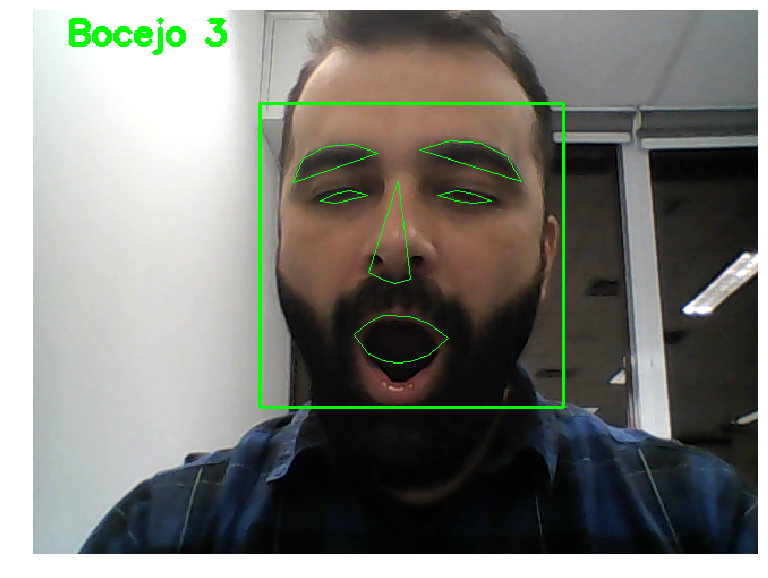

In [25]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook

#imagem_bocejo = "imagens/bocejo/bocejo_1548289094962.png"
exibir_imagem(imagem_bocejo)

## 5. Detector de olhos fechados

A atenção durante um processo de entrevista é algo crucial, e mais marcante neste etapa do processo seletivo. Por esta razão é preciso identificar a quantidade de vezes que o entrevistado feche os olhos, para entendermos se ele de fato está atento as perguntas e ao processo como um todo.

Elabore um algoritmo que detecte os olhos fechados e contabilize ao final da transmissão.

Este caso requer um estudo também geométrico que visa analisar os pontos da marcação dos olhos. Para fins de simplificação, podemos adotar um único olho, e a partir dele, estebelecer o razão de aspecto para quando ele está aberto e fechado.

Construa uma função chamada ```eye_aspect_ratio``` para calcular o aspecto de razão de um dos olhos.

In [28]:
# IMPLEMENTADA NO COMEÇO DO ITEM 4, DEVIDO A NECESSIDADE DA FUNCAO annotate_landmarks_convex_hull_image

Altere a função ```annotate_landmarks_convex_hull_image``` para exibir, no terceiro parâmetro o valor de aspecto de um dos olhos.

No caso do olho, precisamos definir somente um valor máximo de limite.

In [29]:
# IMPLEMENTAR
# Defina um valor máximo para determinar se o olho está fechado
olho_maximo = 0.16

In [30]:
cap = cv2.VideoCapture(0)

qtde_fechado = 0

while True:
    ret, frame = cap.read()
    
    if ret:
        try:
            frame, _, olhos = annotate_landmarks_convex_hull_image(frame)

            # IMPLEMENTAR
            # Defina o algoritmo que irá identificar se o olho esta fechado baseado no limite defindo
            # Crie uma lógica para contar quantas vezes os olhos foram fechados
            # 0 direito, 1 esquerdo
            
             # Adiciona texto na tela de quantidade de bocejos capturados
            cv2.putText(frame, "Olhos Fechados "+str(qtde_fechado), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
            # 0 direito, 1 esquerdo
            cv2.putText(frame, "Olho Direito "+str(round(olhos[0],2)), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
            cv2.putText(frame, "Olho Esquerdo "+str(round(olhos[1],2)), (30, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)


            if olhos[0] <= olho_maximo and olhos[1] <= olho_maximo:
                
                # Aumenta o contador dos olhos fechados
                qtde_fechado += 1
                
               
                # Se o candidato está a tres frames seguidos com os olhos fechados, ele pode estar com sono
                # entao uma imagem eh salva
                if qtde_fechado == 3:
                    # Hora para criacao da foto
                    horario = int(round(time.time() * 1000))
                    imagem_olho = "imagens/olho_fechado/olho_{0}.png" .format(horario)
                    cv2.imwrite(imagem_olho, frame)
            else:
                # Se no frame atual nao foi identificado olhos fechados, ele pode ter piscado
                qtde_fechado = 0
                
            # Adiciona texto na tela de quantidade de bocejos capturados
            cv2.putText(frame, "Olhos Fechados "+str(qtde_fechado), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
            # 0 direito, 1 esquerdo
            cv2.putText(frame, "Olho Direito "+str(round(olhos[0],2)), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
            cv2.putText(frame, "Olho Esquerdo "+str(round(olhos[1],2)), (30, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)
            cv2.imshow("Detector de olhos fechados", frame)
        
        except:
            # Adiciona texto na tela de quantidade de bocejos capturados
            cv2.putText(frame, "Olhos Fechados "+str(qtde_fechado), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4)                         
            cv2.putText(frame, "Olho fechado nao identificado", (250, 450), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)
            cv2.imshow('Detector de olhos fechados', frame)
            
        # Se for teclado Enter (tecla 13) deverá sair do loop e encerrar a captura de imagem   
        if cv2.waitKey(1) == 13:
            break

close_windows()

Armazene um exemplo de uma imagem, na pasta ```imagens``` com os olhos fechados detectado para exibição.

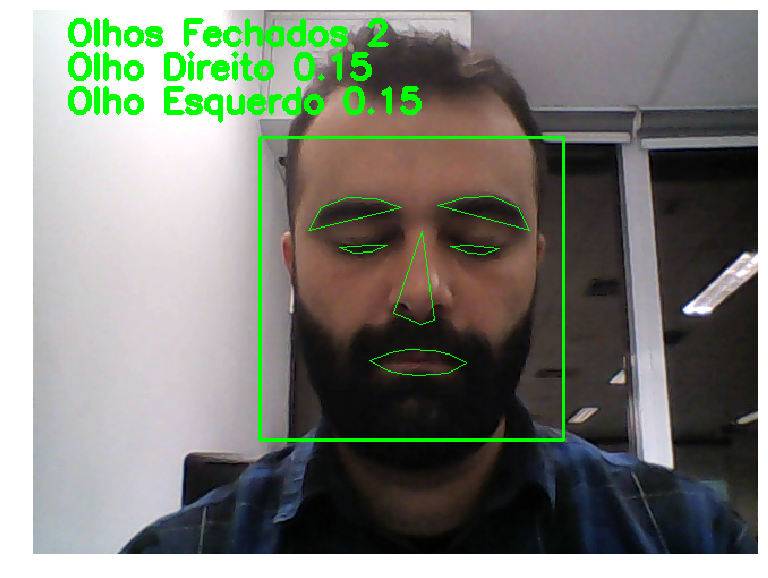

In [31]:
# IMPLEMENTAR
# Passe o parâmetro localização da imagem para exibi-la no notebook
#imagem_olho = "imagens/olho_fechado/olho_1548289253893.png"
exibir_imagem(imagem_olho)

## 6. Descritor de objetos na cena

A organização do local na casa do entrevistado é um item relevante, pois a partir destes detalhes é possível traçar alguns tipos de perfis que são essenciais para certas posições nas empresas.

Desta forma precisamos construir um algoritmo que realize uma inspeção de objetos na área da câmera que é utilizada para fazer a entrevista. Ao final mostre quais e quantos objetos foram detectados.

É necessário baixar os pesos (modelo de deep-learning) neste link https://pjreddie.com/media/files/yolov3.weights e copiar para  pasta weights.

In [79]:
from utils import *
from darknet import Darknet

# Configurações na rede neural YOLOv3
cfg_file = 'cfg/yolov3.cfg'
m = Darknet(cfg_file)

# Pesos pré-treinados
weight_file = 'modelos/yolov3.weights'
m.load_weights(weight_file)

# Rótulos de classes
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

In [80]:
# Verificando a rede
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

Ajuste os valores de NMS (_Non-Maximum Supression_) para regular a sensibilidade de imagens com baixa luminosidade e IOU (_Intersect of Union_) que definie o indicador se o retângulo de identificação de imagem foi adequadamente desenhado.

In [82]:
# IMPLEMENTAR
# Definia apropriadamente os valores de limiar de NMS e IOU

# Sensibilidade baixa apresentou mais itens na imagem
nms_thresh = 0.3

# Retangulo identificado baixo apresentou menos desenhos no mesmo objeto
iou_thresh = 0.4

Separe um imagem que será analisada pelo classificador, após teclar o _Enter_. Armazene no diretório ```imagens/local-entrevista.png```.

In [84]:


cam_capture = cv2.VideoCapture(0)

while True:
    ret, image_frame = cam_capture.read()
    
    if ret:
        cv2.imshow("Inspecao Local", image_frame)
        
        # IMPLEMENTAR
        # Após teclar enter, armazene uma imagem para posterior análise
        if cv2.waitKey(1) == 13:
            cv2.imwrite('imagens/local-entrevista.png', image_frame)
            break
        
cam_capture.release()
cv2.destroyAllWindows()

A imagem a ser analisada.

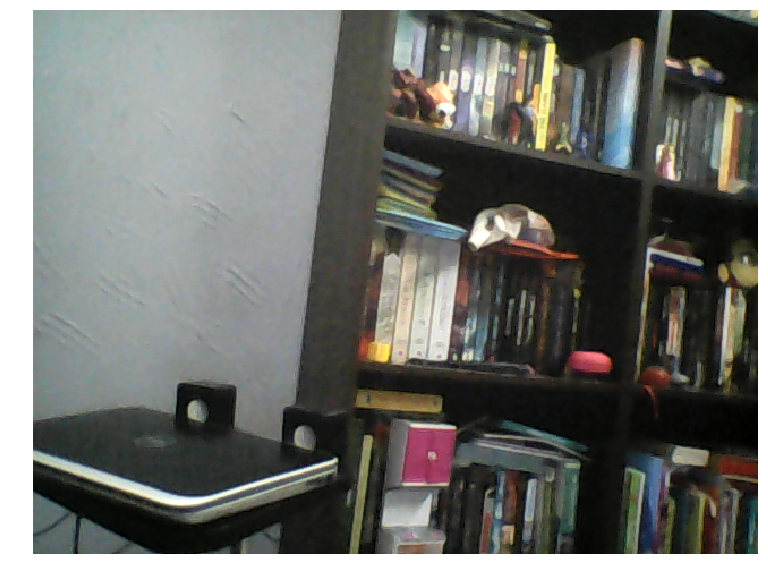

In [87]:
# IMPLEMENTAR
# Altere abaixo o parâmetro de entrada para o caminho onde a imagem foi armazenada
# Imagem ja no diretorio

exibir_imagem('imagens/local-entrevista.png')

Os passos abaixo são para configuração da imagem no padrão que o classificador foi treinado.

In [92]:


# Definindo tamnaho do gráfico
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Carregar imagem para classificação
img = cv2.imread('imagens/local-entrevista.png')

# Conversão para o espaço RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Redimensionamento para adatapção da primeira camada da rede neural 
resized_image = cv2.resize(original_image, (m.width, m.height))

# Deteteção de objetos na imagem
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Desenho no gráfico com os regângulos e rótulos
plot_boxes(original_image, boxes, class_names, plot_labels = True)



TypeError: argument 0 is not a Variable

Obtenha os objetos identificados a partir da função ```list_objects(boxes, class_names)```. Será retornardo uma lista de objetos que deverá ser analisado para contar a quantidade de cada objeto. Se houver mais de um item igual, por exemplo _tvmonitor_ ele aparecerá duplicado na imagem.

In [47]:
# IMPLEMENTAR
# Conte os objetos identificados pelo classificador, de forma que seja exibido 
# objeto 1, quantidade 1
# objeto 2, quantidade 1
# ...

from collections import Counter

# Contador de objetos
objetos = Counter(list_objects(boxes, class_names))

# Loop para exibicao:
for x in objetos:
    print('objeto {0}, quantidade {1}'.format(x, objetos[x]))

NameError: name 'boxes' is not defined

## Conclusões finais

**Pergunta:** Diante de todos os desafios propostos (1 ao 6) e soluções encontradas, quais seriam os próximos passos de forma a tornar mais precisos cada atividade, levando em consideração: (1) restrições de processamento em tempo real, (2) sem restrições de processamento em tempo real?

**Resposta**:

1-) Com Restrições:
Em um ambiente com restrições, e com poder computacional reduzido, determinados passos não podem ser realizado pois irão afetar diretamente a performance do processamento. Tratamentos como redução para escala de cinza e redimensionar a imagem são ótimos para redução de processamento, uma vez que a matriz que representa a imagem possui somente uma dimensão, e não três, representando as cores (BGR). Dessa forma os demais processamentos ficam mais leves, como os treinamentos dos modelos e a identifação de pontos via DLib, dando mais folga para o processador computar, por exemplo, aumentar a qualidade do processamento e até mesmo aumentar a quantidade de pontos identificados no rosto.  


2-) Sem Restrições:
Quando falamos de melhorar a precisão das atividades realizadas neste projeto, temos que considerar a capacidade de Hardware, como o processamento computacional e qualidade da webcam/camera. Além de fatores externos como, por exemplo, a luminosidade do local. Todas essas questões afetam diretamente os resultados esperados, e para melhorar a precisão em casos que não há restrições é possível aplicar tratamentos de ajustes de brilho, extração de ruídos e padronizar a dimensionalidade. Dessa forma, aumentamos o tretamento da imagem em busca de padronização, para que os modelos possam realizar as predições das imagens com mais qualidade. Para situações de reconhecimento via DLIB, adicionar os 8 pontos internos (atualmente só é considerado 12 pontos externos) dos lábios aumentaria o grau de reconhecimento, podendo verificar situações onde a pessoa análisada esteja fazendo uma caretaa, por exemplo.
